# Naive Bayes

- Naive Bayes is a common traditional machine learning algorithm for classification task.
- Important assumptions behind Naive Bayes:
    - Features are independent of each other
    - Features have equal contributions to the prediction
- When applying Naive Bayes to text data, we need to convert text data into numeric features.
    - bag-of-words model
    - vectorization issues
- Applications
    - Text Classification

## Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

## Fetech Data

In [2]:
data = fetch_20newsgroups()

In [3]:
print(type(data))
print(len(data.filenames)) # doc num

<class 'sklearn.utils.Bunch'>
11314


In [4]:
text_categories = data.target_names
print(len(text_categories)) # total number of text categories

20


## Train-Test Split

In [5]:
train_data = fetch_20newsgroups(subset="train", categories = text_categories)
test_data = fetch_20newsgroups(subset="test", categories = text_categories)

In [6]:
print("There are {} unique classes (text categories)".format(len(text_categories)))
print("Training Sample Size: {}".format(len(train_data.data)))
print("Test Sample Size: {}".format(len(test_data.data)))

There are 20 unique classes (text categories)
Training Sample Size: 11314
Test Sample Size: 7532


## Data Inspection

In [7]:
print(train_data.data[5][:200])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tav


## Building Pipeline

- The modeling pipeline should include:
    - text transformation (vectorization)
    - naive bayes modeling

In [8]:
# Build model pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using training data
model.fit(train_data.data, train_data.target)
# Predict the classes of test data
predicted_categories = model.predict(test_data.data)

## Evaluation

```{note}
By default, the confusion matrix indicate the correct labels on the rows and predicted labels on the columns.
```

In [9]:
accuracy_score(test_data.target, predicted_categories)

0.7738980350504514

In [10]:
mat = confusion_matrix(test_data.target, predicted_categories)

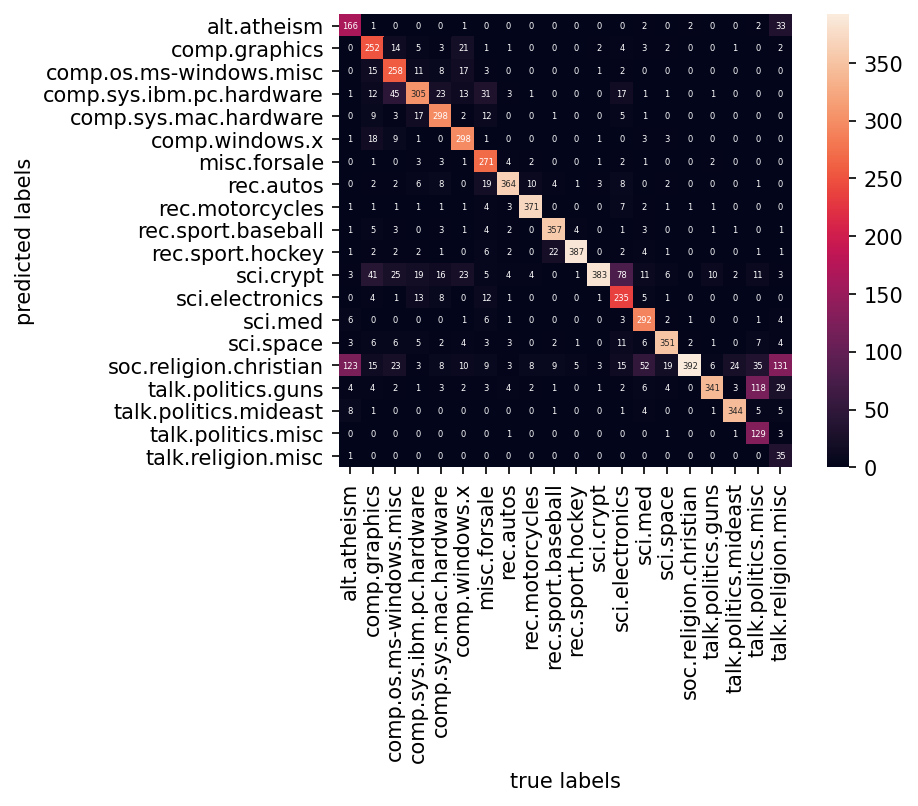

In [11]:
import matplotlib
matplotlib.rcParams['figure.dpi']= 150

sns.heatmap(mat.T, square=True, annot=True, fmt="d",
           xticklabels=test_data.target_names,
           yticklabels=test_data.target_names,
           annot_kws={"size":4})
plt.xlabel("true labels")
plt.ylabel("predicted labels")
plt.show()

## References

- [Text Classification Using Naive Bayes: Theory & A Working Example](https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a)